In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

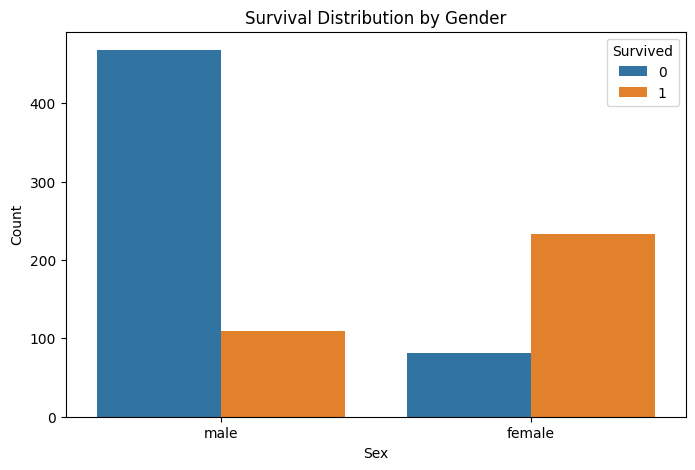

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

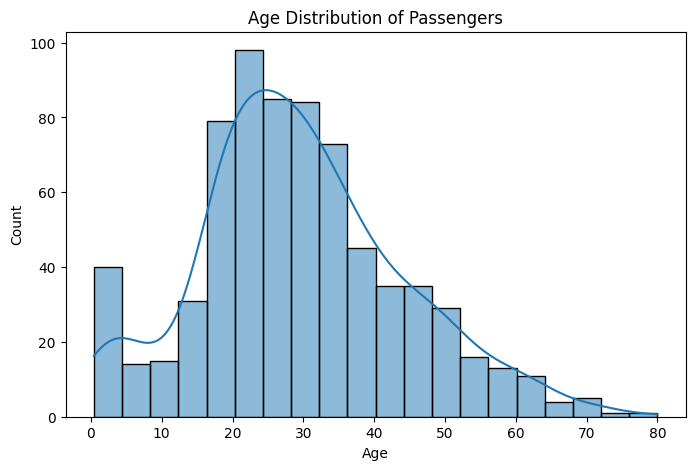

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
train['Age'] = train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [14]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train.drop(['Cabin', 'Ticket','Name'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket','Name'], axis=1, inplace=True)

In [15]:
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

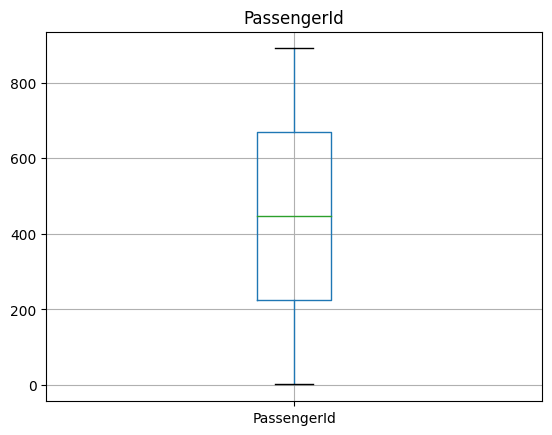

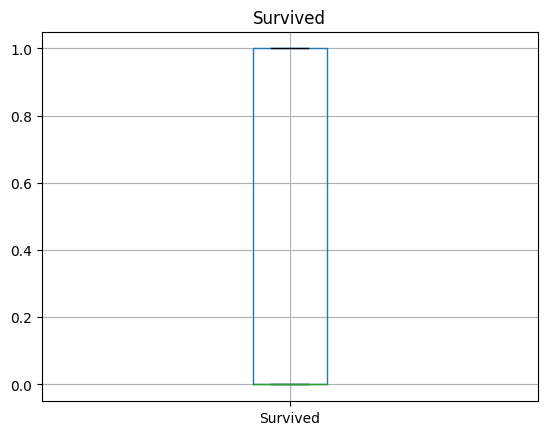

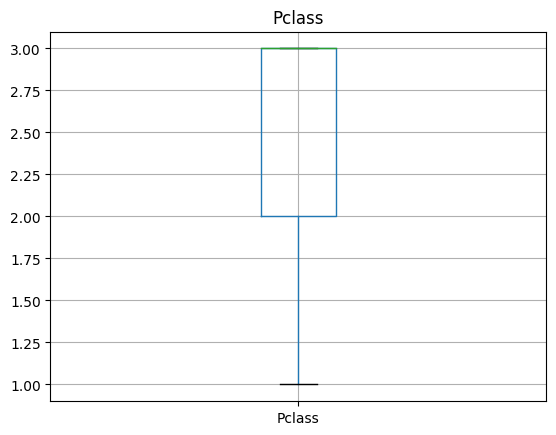

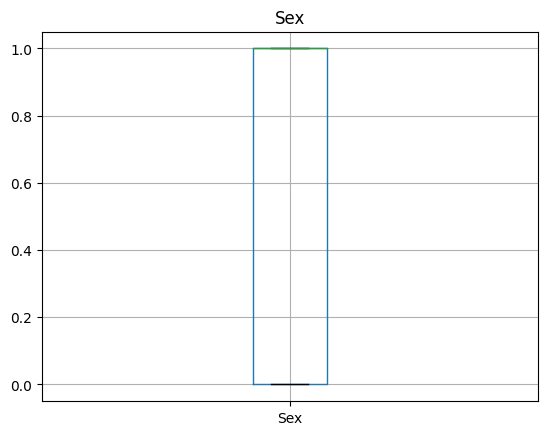

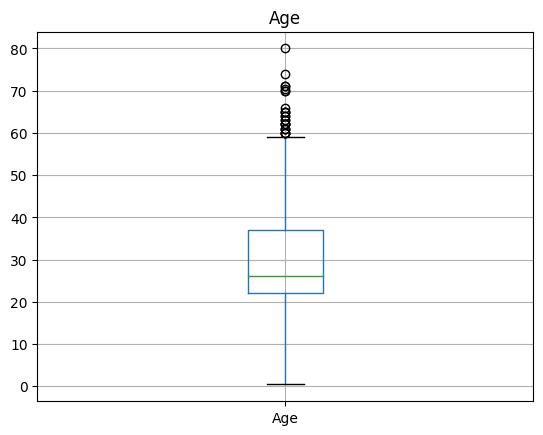

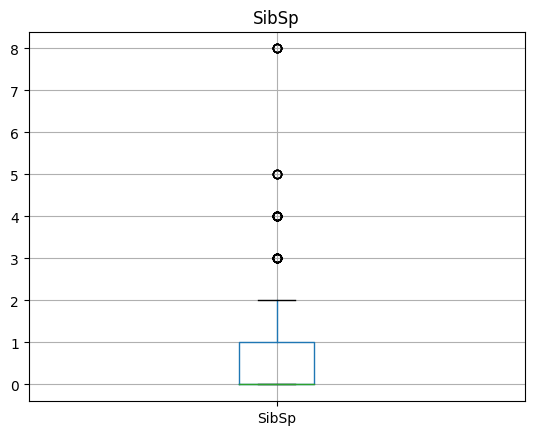

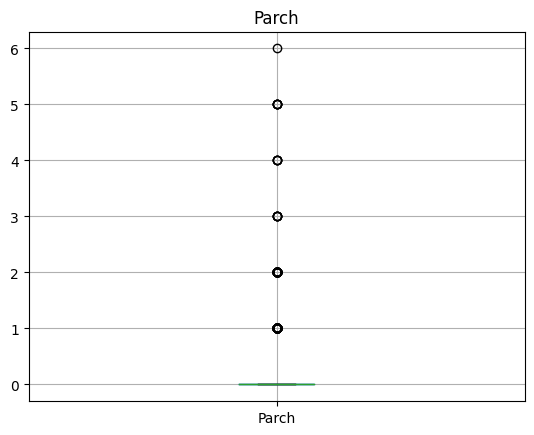

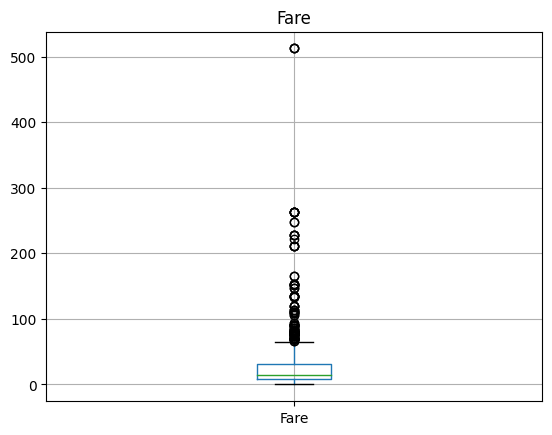

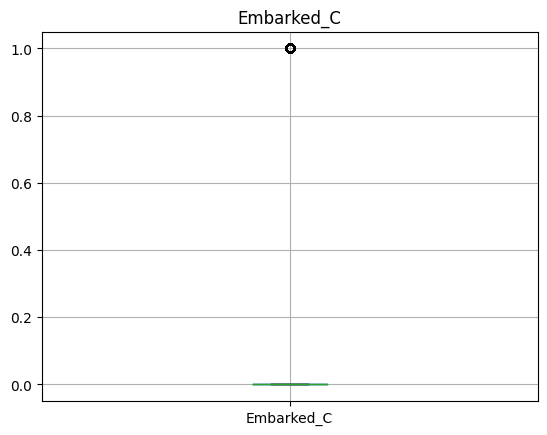

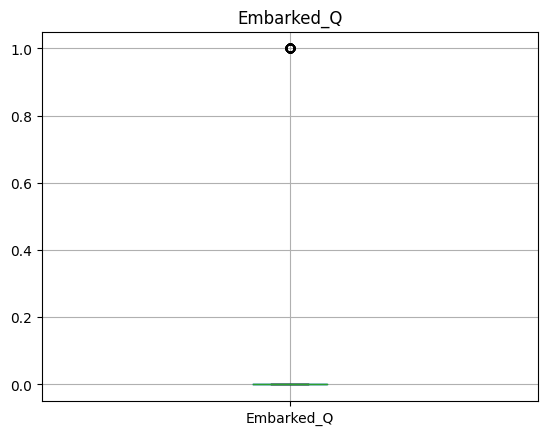

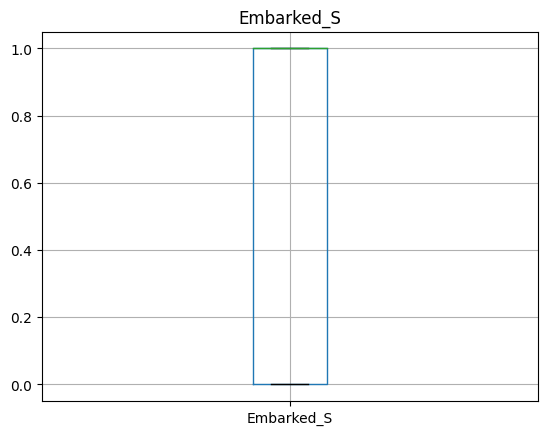

In [16]:
if 'Title' in train.columns:
    train.drop(['Title'], axis=1, inplace=True)
for i in train.columns:
    if train[i].dtype != 'O':  
        plt.figure()
        train.boxplot([i])
        plt.title(i)
plt.show()

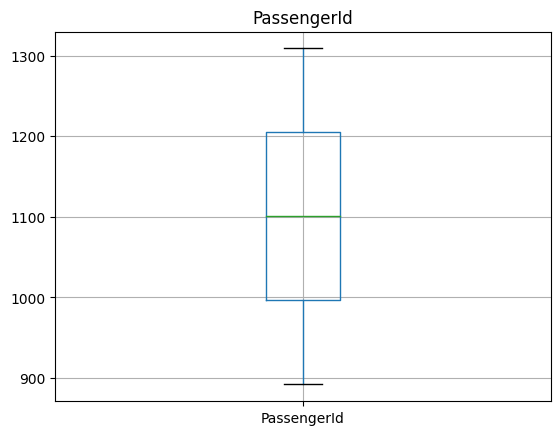

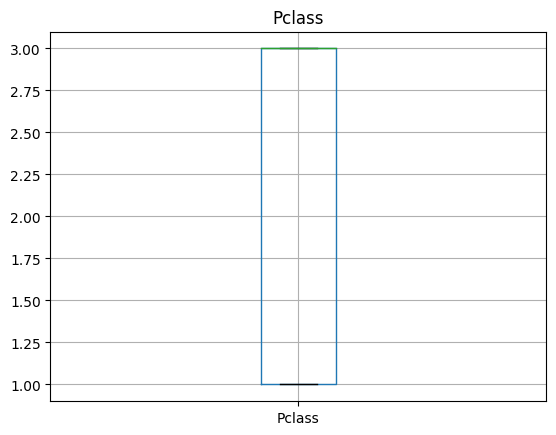

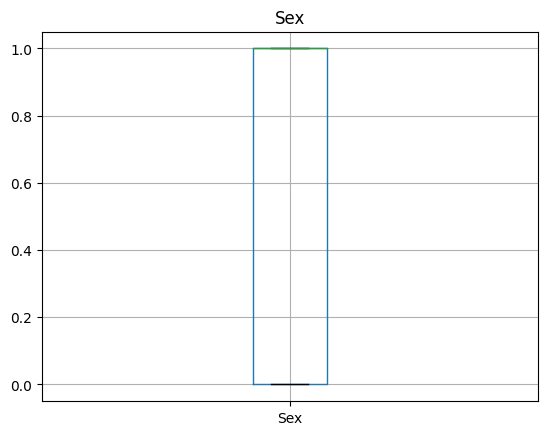

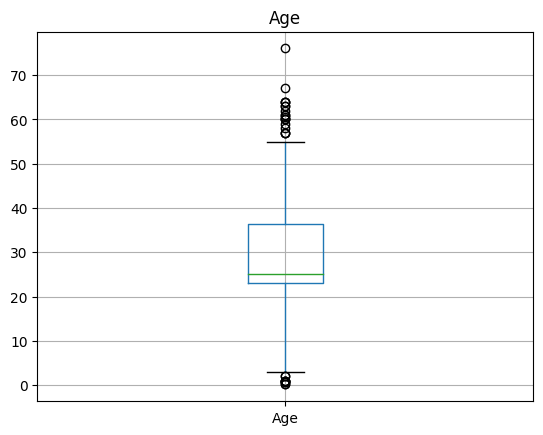

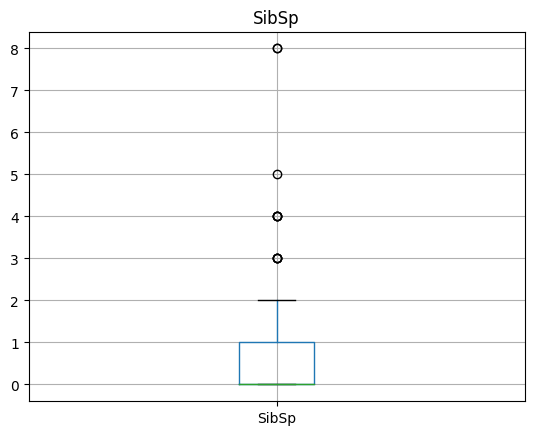

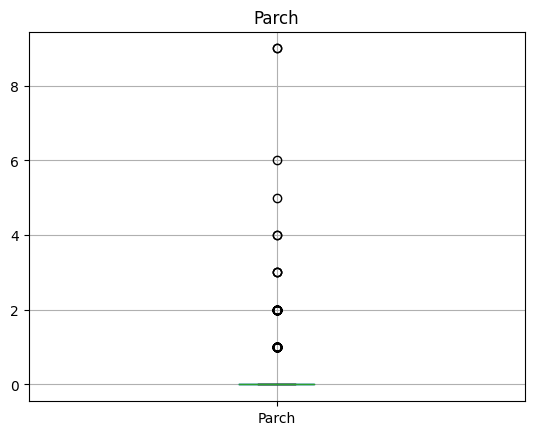

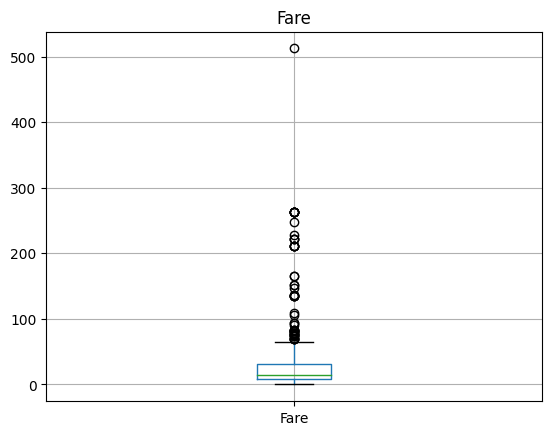

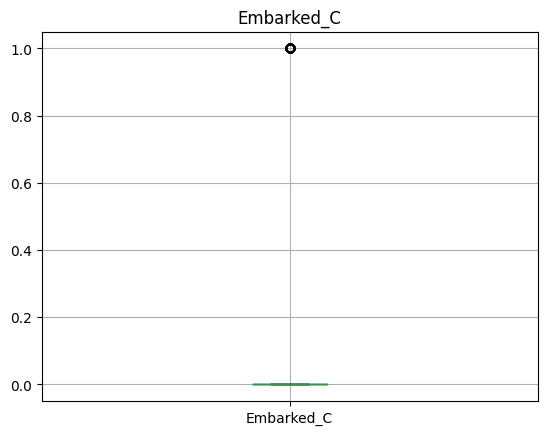

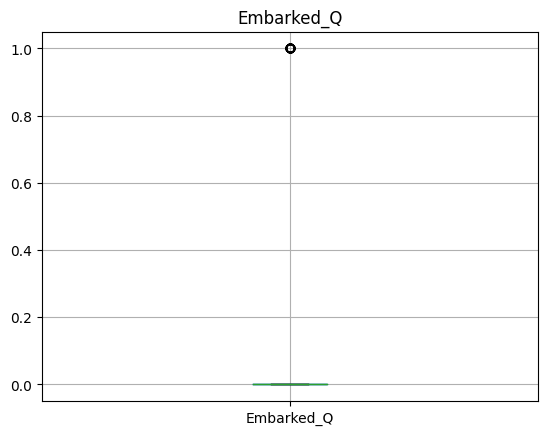

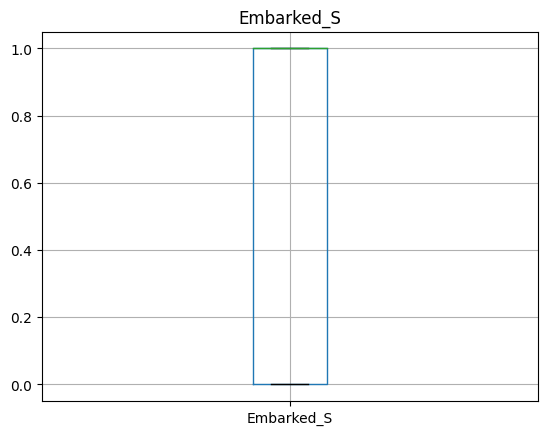

In [17]:
if 'Title' in test.columns:
    test.drop(['Title'], axis=1, inplace=True)
for i in test.columns:
    if test[i].dtype != 'O':  
        plt.figure()
        test.boxplot([i])
        plt.title(i)

In [18]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
a=['Fare','Age','Parch','SibSp']
for i in a:
    train[i] = pt.fit_transform(train[i].values.reshape(-1,1))
    test[i] = pt.fit_transform(test[i].values.reshape(-1,1))

In [19]:
a=['Fare','Age','Parch','SibSp']
for i in a:
    train[i] = winsorize(train[i], limits=[0.05, 0.05])
    test[i] = winsorize(test[i], limits=[0.05, 0.05])

In [20]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [23]:
y_pred_rf = best_rf_model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[94 11]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [24]:
y_pred_test_rf = best_rf_model.predict(test)
rf2=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred_test_rf})
rf2.to_csv('gender_submission.csv',index=False)